In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from def_functions import *
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

数据预处理：

In [2]:
train_num=pd.read_csv('data/train_num0422.csv')
test_num=pd.read_csv('data/test_num0422.csv')

In [3]:
train_num.describe()

,企业编号,营业总收入(元),存货周转天数(天),总资产周转率(次),应收账款周转天数(天),流动比率,速动比率,资产负债率(%),基本每股收益(元),扣非每股收益(元),...,股东所占比例,认缴出资信息,实缴出资信息,年报年份_x,专利类型,证书名称,状态,软件全称,年报年份_y,企业总评分
count,2956.000000,2956.000000,2.955000e+03,2955.000000,2955.000000,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,...,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000
mean,2502.771651,647.029123,1.824504e+04,3.890474,0.320300,24.003602,0.364066,5.481699,2.564164,2.447301,...,0.329161,26.797023,26.040257,26.821380,178.468877,30.602503,27.345737,12.021313,3.958051,83.739845
std,867.163675,2775.596536,4.657142e+05,3.246464,1.003085,26.862841,0.985267,6.575284,3.850597,3.650925,...,2.863075,30.466526,30.096743,30.454836,1211.961523,160.372586,160.033999,55.502283,1.541617,5.098489
min,1001.000000,0.616900,2.900000e-01,0.040000,-2.949982,0.990000,-2.869619,0.093808,-10.960000,-10.960000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.024840
25%,1750.750000,52.782500,4.892050e+02,1.910000,-0.249112,10.787500,-0.234695,2.219327,0.681550,0.617725,...,0.000000,10.000000,10.000000,10.000000,0.000000,1.000000,0.000000,0.000000,3.000000,79.638031
50%,2502.500000,127.525000,9.754800e+02,3.160000,0.347453,15.915000,0.267835,3.848475,1.737400,1.666650,...,0.000000,17.000000,17.000000,17.000000,16.000000,8.000000,6.000000,0.000000,5.000000,83.343093
75%,3252.250000,355.795000,2.096915e+03,4.925000,0.923639,26.422500,0.865346,6.572305,3.560575,3.371175,...,0.000000,32.000000,31.000000,32.000000,100.000000,16.000000,12.000000,3.000000,5.000000,87.439268
max,4000.000000,51379.000000,2.499157e+07,59.730000,4.206807,468.220000,4.239549,142.696090,113.540000,113.540000,...,100.000000,491.000000,491.000000,491.000000,39448.000000,4074.000000,4070.000000,1205.000000,6.000000,94.990901


In [4]:
test_num.describe()

,企业编号,营业总收入(元),存货周转天数(天),总资产周转率(次),应收账款周转天数(天),流动比率,速动比率,资产负债率(%),基本每股收益(元),扣非每股收益(元),...,股东类型,股东所占比例,认缴出资信息,实缴出资信息,年报年份_x,专利类型,证书名称,状态,软件全称,年报年份_y
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,...,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,4263.407692,77.517075,1601.687802,3.781558,0.138727,35.581118,0.401960,6.296124,3.258614,3.179969,...,2.255769,0.919231,48.038462,46.986538,48.065385,96.909615,20.121154,13.759615,24.286538,3.925000
std,152.094722,243.288039,1366.615799,3.313244,1.005097,34.958014,1.060818,4.290549,3.235641,3.084152,...,11.257794,3.861925,41.950086,42.077800,41.932549,187.320004,41.022654,34.530179,50.865653,1.491191
min,4001.000000,5.995900,0.260000,0.640000,-2.831749,3.920000,-2.576232,0.411434,-2.190000,-2.190000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4130.750000,21.316925,732.352500,2.200000,-0.389525,15.427500,-0.293972,3.108270,1.448775,1.409400,...,0.000000,0.000000,22.000000,20.000000,22.000000,0.000000,6.000000,3.000000,0.000000,3.000000
50%,4264.500000,34.475000,1209.752914,3.090000,0.220107,25.015000,0.330639,5.241279,2.559250,2.510000,...,0.000000,0.000000,38.000000,38.000000,38.000000,49.500000,11.000000,7.000000,3.000000,5.000000
75%,4394.250000,68.042500,2015.015000,4.452500,0.764225,41.040000,1.012167,8.356782,4.089850,4.032500,...,0.000000,0.000000,58.250000,57.250000,58.250000,112.500000,19.000000,12.000000,31.000000,5.000000
max,4525.000000,3737.000000,9145.590000,56.900000,2.625893,412.120000,3.675291,26.712572,32.254100,24.534100,...,103.000000,42.000000,336.000000,336.000000,336.000000,2113.000000,488.000000,486.000000,651.000000,5.000000


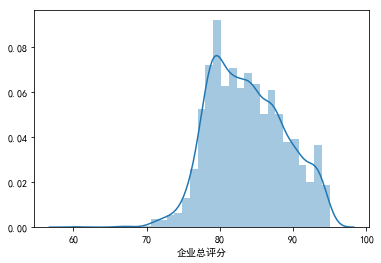

In [5]:
#histogram
sns.distplot(train_num['企业总评分'])

In [6]:
#skewness and kurtosis
print("Skewness: %f" % train_num['企业总评分'].skew())
print("Kurtosis: %f" % train_num['企业总评分'].kurt())

Skewness: 0.159097
Kurtosis: -0.477679


In [7]:
#standardizing data
scores_scaled = StandardScaler().fit_transform(train_num['企业总评分'][:,np.newaxis]);
low_range = scores_scaled[scores_scaled[:,0].argsort()][:10]
high_range= scores_scaled[scores_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-4.65216644]
 [-3.33190332]
 [-3.30876217]
 [-3.15288997]
 [-2.60049052]
 [-2.54827292]
 [-2.51759795]
 [-2.48706882]
 [-2.4734984 ]
 [-2.46807702]]

outer range (high) of the distribution:
[[2.08818183]
 [2.10809815]
 [2.11676564]
 [2.12208001]
 [2.13103552]
 [2.14007991]
 [2.14019871]
 [2.14298459]
 [2.16868124]
 [2.20711681]]


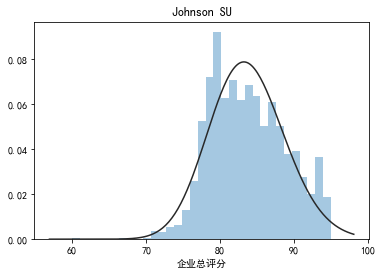

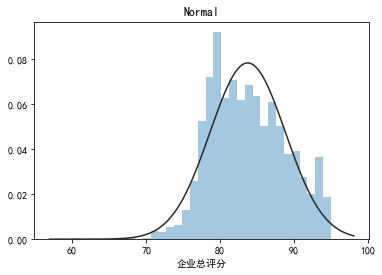

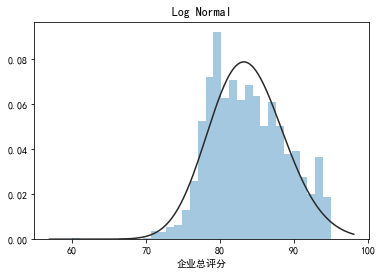

In [8]:
y = train_num['企业总评分']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

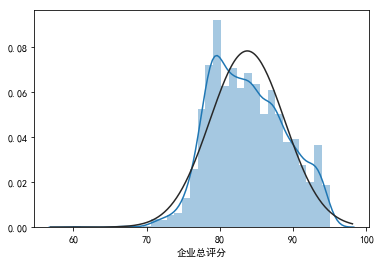

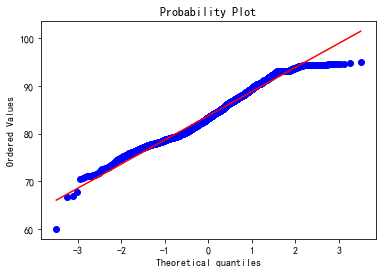

In [9]:
#histogram and normal probability plot
sns.distplot(train_num['企业总评分'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_num['企业总评分'], plot=plt)

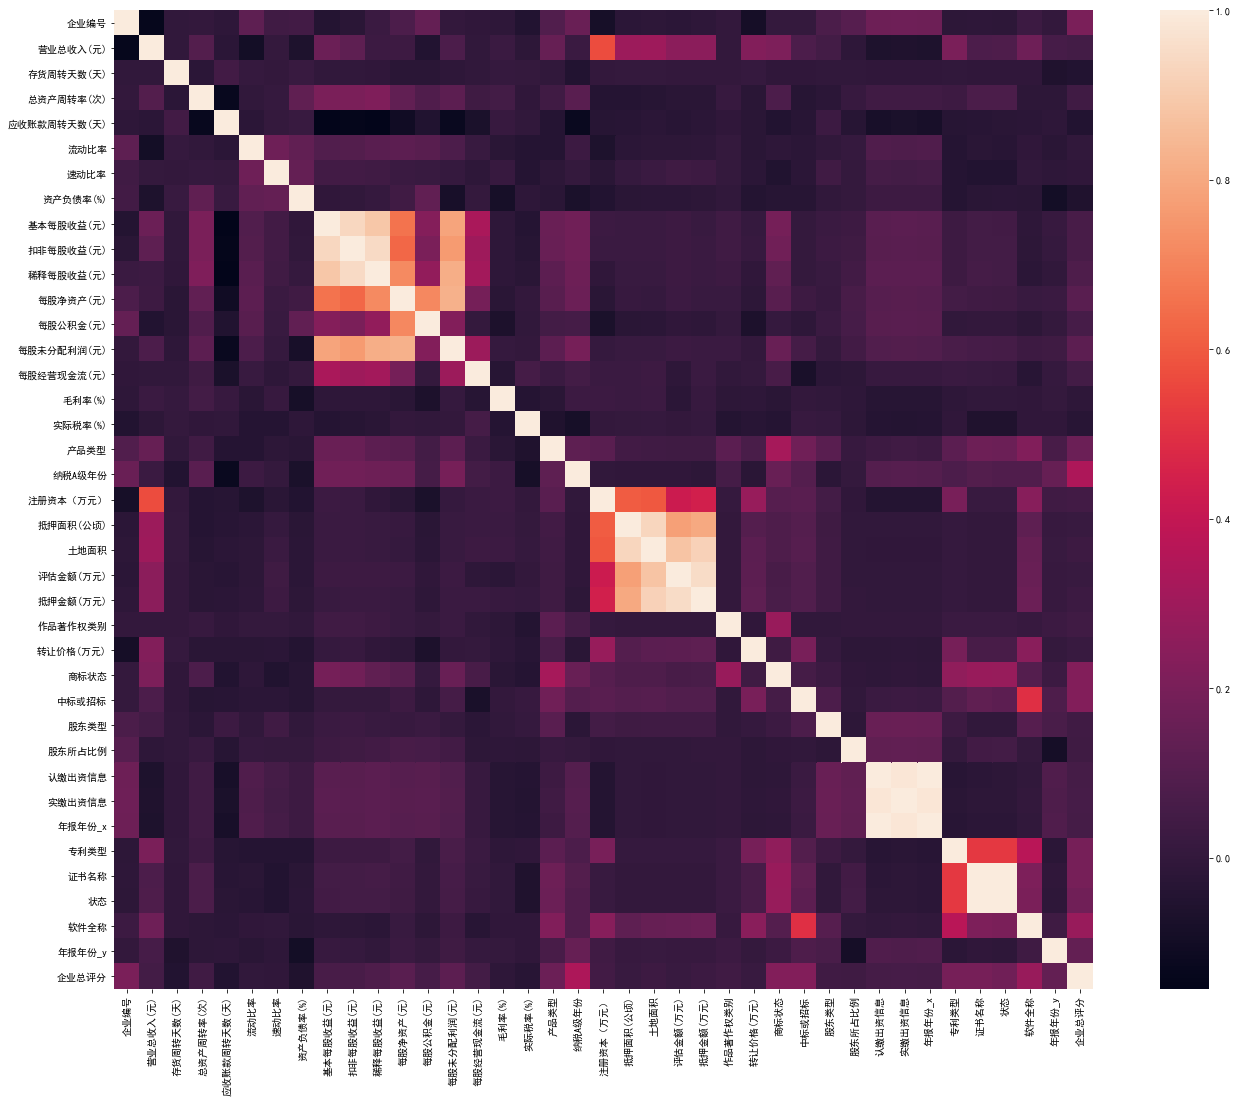

In [10]:
#correlation matrix
corrmat = train_num.corr()
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(corrmat, square=True);

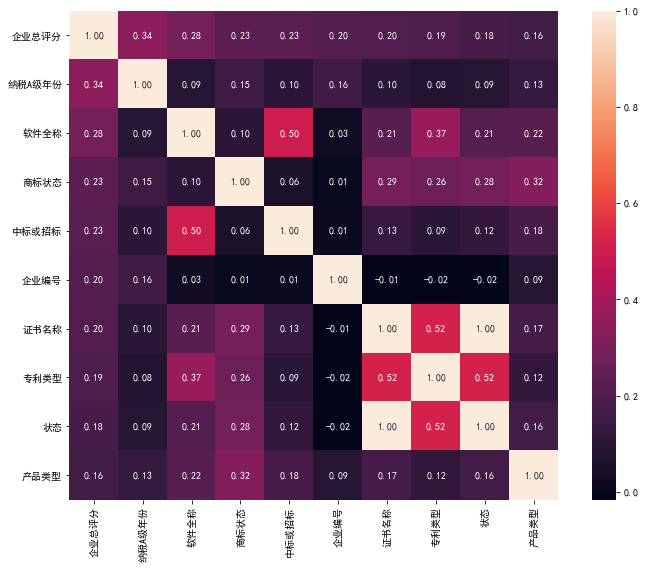

In [11]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, '企业总评分')['企业总评分'].index
cm = np.corrcoef(train_num[cols].values.T)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [12]:
corrmat["企业总评分"].sort_values(ascending=False)[:10]

企业总评分     1.000000
纳税A级年份    0.339515
软件全称      0.283775
商标状态      0.228056
中标或招标     0.225528
企业编号      0.202563
证书名称      0.195561
专利类型      0.193846
状态        0.177202
产品类型      0.162378
Name: 企业总评分, dtype: float64

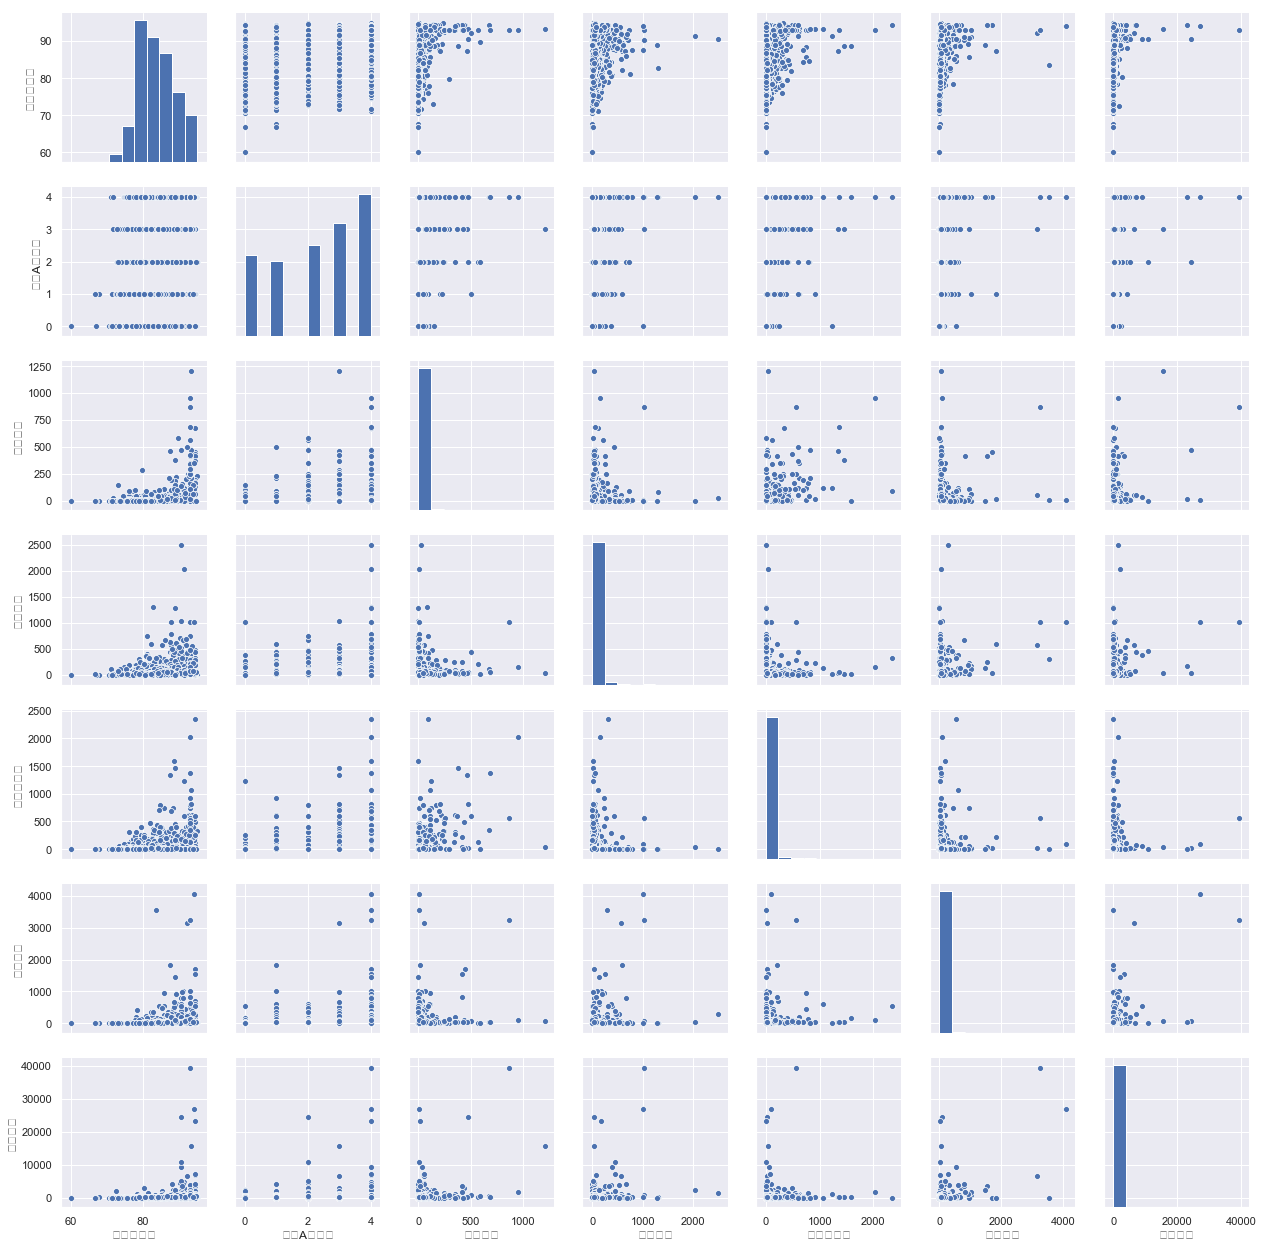

In [13]:
sns.set()
cols = ['企业总评分', '纳税A级年份', '软件全称', '商标状态', '中标或招标', '证书名称', '专利类型']
sns.pairplot(train_num[cols], size = 2.5)

缺失值处理：

In [14]:
missing_data=missing_values_table(train_num)
missing_data.head(10)

,Missing Values,percent of Total Values
转让价格(万元),1652,0.558863
实际税率(%),122,0.041272
毛利率(%),70,0.023681
存货周转天数(天),1,0.000338
总资产周转率(次),1,0.000338
应收账款周转天数(天),1,0.000338
行业大类（代码）,1,0.000338


In [15]:
drop_columns=missing_data[missing_data['percent of Total Values'] > 0.5]
train_num = train_num.drop(drop_columns.index,1)
test_num = test_num.drop(drop_columns.index,1)

In [16]:
train_num['实际税率(%)'] = train_num['实际税率(%)'].fillna(train_num['实际税率(%)'].mean())
train_num['毛利率(%)'] = train_num['毛利率(%)'].fillna(train_num['毛利率(%)'].mean())
train_num['存货周转天数(天)'] = train_num['存货周转天数(天)'].fillna(train_num['存货周转天数(天)'].mean())
train_num['总资产周转率(次)'] = train_num['总资产周转率(次)'].fillna(train_num['总资产周转率(次)'].mean())
train_num['应收账款周转天数(天)'] = train_num['应收账款周转天数(天)'].fillna(train_num['应收账款周转天数(天)'].mean())
train_num['行业大类（代码）'] = train_num['行业大类（代码）'].fillna(train_num['行业大类（代码）'].mode()[0])
train_num.isnull().sum().max()

0

In [17]:
quantitative = [f for f in train_num.columns if train_num.dtypes[f] != 'object']
quantitative.remove('企业总评分')
quantitative.remove('企业编号')
qualitative = [f for f in train_num.columns if train_num.dtypes[f] == 'object']

In [18]:
def plot_box(var):
    data = pd.concat([train_num['企业总评分'], train_num[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="企业总评分", data=data)
    fig.axis(ymin=60, ymax=100);    

In [19]:
def plot_scatter(var):
    data = pd.concat([train_num['企业总评分'], train_num[var]], axis=1)
    data.plot.scatter(x=var, y='企业总评分',ylim=(60,100));

In [20]:
def plot_prob(var):
    sns.distplot(train_num[var], fit=norm);
    fig = plt.figure()
    res = stats.probplot(train_num['企业总评分'], plot=plt)

In [21]:
train_num['纳税A级年份'].unique()

array([4., 3., 2., 0., 1.])

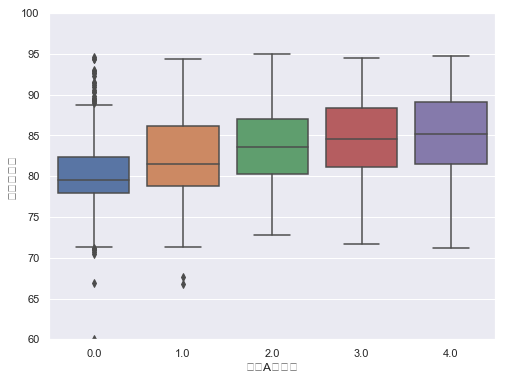

In [22]:
plot_box('纳税A级年份')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


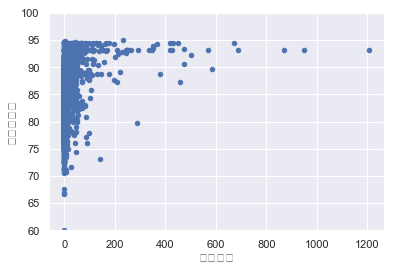

In [23]:
plot_scatter('软件全称')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


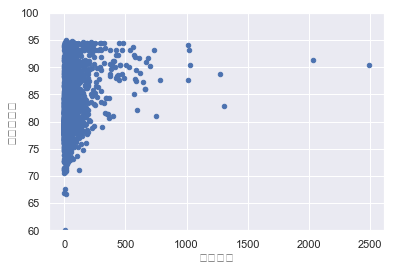

In [24]:
plot_scatter('商标状态')

In [25]:
train_num=train_num[train_num['商标状态']<1500]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


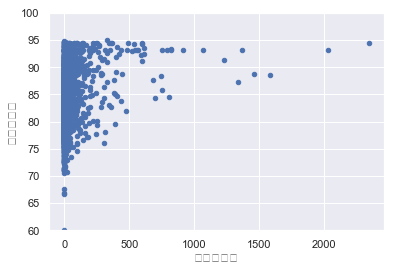

In [26]:
plot_scatter('中标或招标')

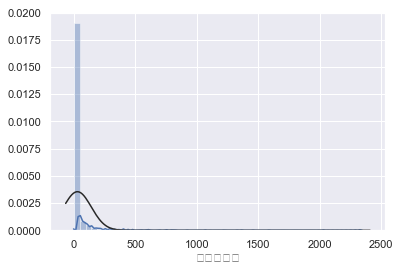

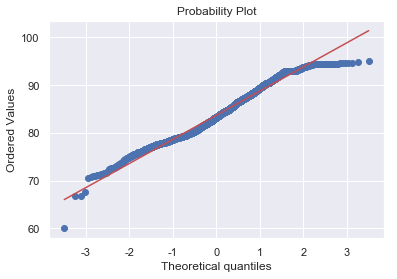

In [27]:
plot_prob('中标或招标')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


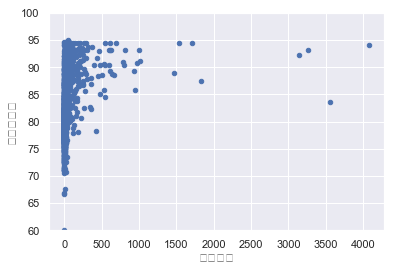

In [28]:
plot_scatter('证书名称')

In [29]:
train_num=train_num[train_num['证书名称']<2000]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


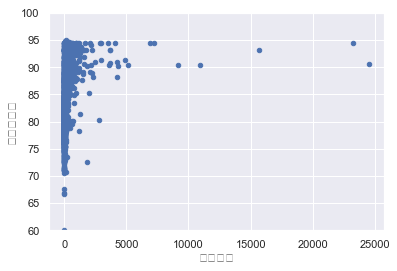

In [30]:
plot_scatter('专利类型')

In [31]:
train_num=train_num[train_num['专利类型']<10000]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


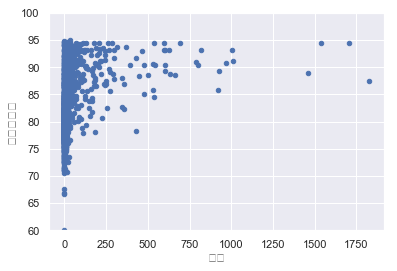

In [32]:
plot_scatter('状态')

In [33]:
train_num=train_num[train_num['状态']<1250]

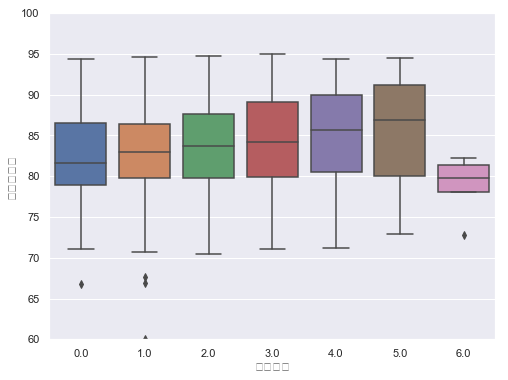

In [34]:
plot_box('产品类型')

In [35]:
train_num=train_num[train_num['产品类型']<6]

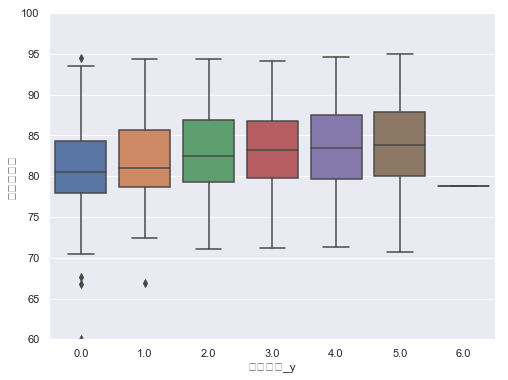

In [36]:
plot_box('年报年份_y')

In [37]:
train_num=train_num[train_num['年报年份_y']<6]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


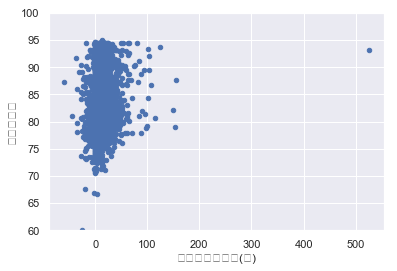

In [38]:
plot_scatter('每股未分配利润(元)')

In [39]:
train_num=train_num[train_num['每股未分配利润(元)']<200]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


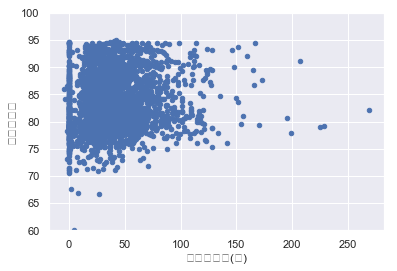

In [40]:
plot_scatter('每股净资产(元)')

In [41]:
train_num=train_num[train_num['每股净资产(元)']<150]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


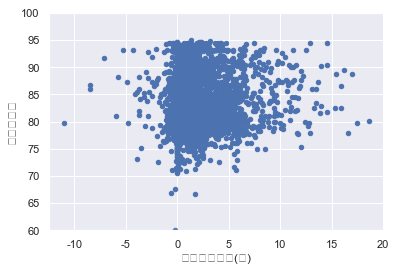

In [42]:
plot_scatter('稀释每股收益(元)')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


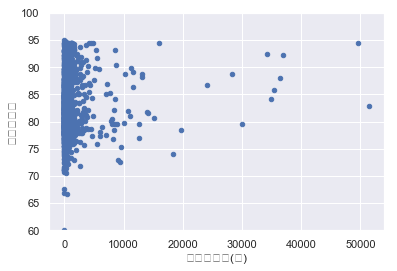

In [43]:
var = '营业总收入(元)'
data = pd.concat([train_num['企业总评分'], train_num[var]], axis=1)
data.plot.scatter(x=var, y='企业总评分',ylim=(60,100));

In [44]:
train_num=train_num[train_num['营业总收入(元)']<40000]

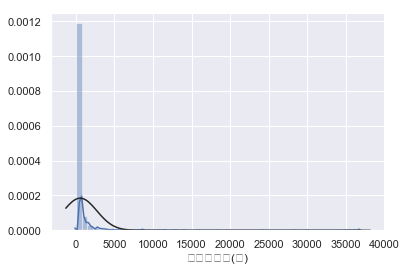

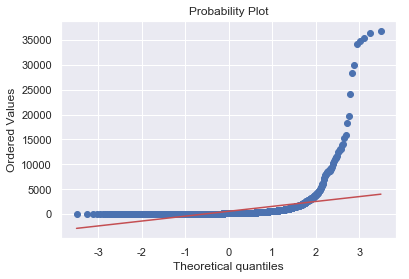

In [45]:
#histogram and normal probability plot
sns.distplot(train_num[var], fit=norm);
fig = plt.figure()
res = stats.probplot(train_num[var], plot=plt)

In [179]:
train_num[var]=np.log(train_num[var])

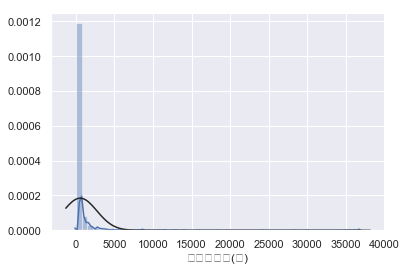

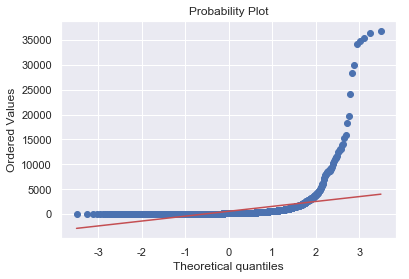

In [46]:
#histogram and normal probability plot
sns.distplot(train_num[var], fit=norm);
fig = plt.figure()
res = stats.probplot(train_num[var], plot=plt)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


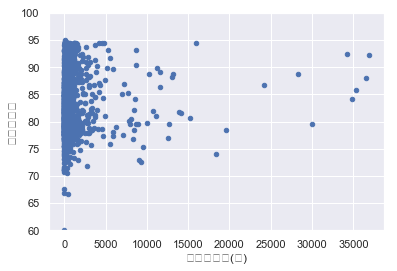

In [47]:
var = '营业总收入(元)'
data = pd.concat([train_num['企业总评分'], train_num[var]], axis=1)
data.plot.scatter(x=var, y='企业总评分',ylim=(60,100));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


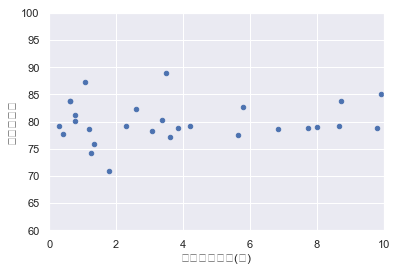

In [48]:
var = '存货周转天数(天)'
data = pd.concat([train_num['企业总评分'], train_num[var]], axis=1)
data.plot.scatter(x=var, y='企业总评分',xlim=(0,10),ylim=(60,100));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


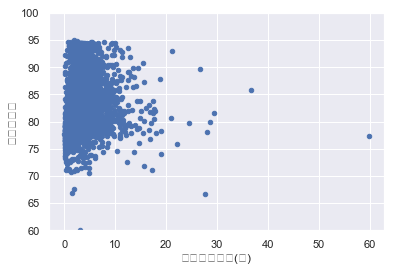

In [49]:
var = '总资产周转率(次)'
data = pd.concat([train_num['企业总评分'], train_num[var]], axis=1)
data.plot.scatter(x=var, y='企业总评分',ylim=(60,100));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


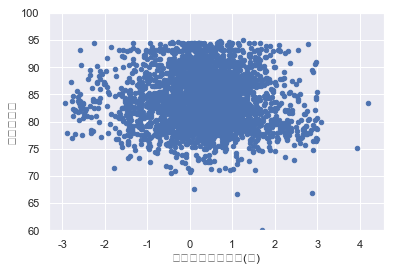

In [50]:
var = '应收账款周转天数(天)'
data = pd.concat([train_num['企业总评分'], train_num[var]], axis=1)
data.plot.scatter(x=var, y='企业总评分',ylim=(60,100));

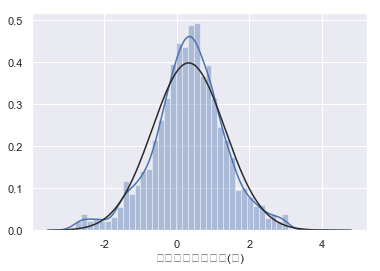

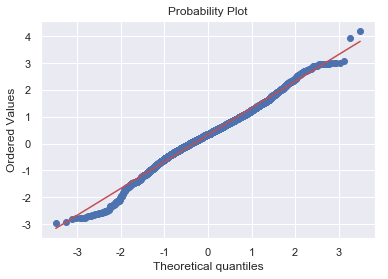

In [51]:
#histogram and normal probability plot
sns.distplot(train_num[var], fit=norm);
fig = plt.figure()
res = stats.probplot(train_num[var], plot=plt)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


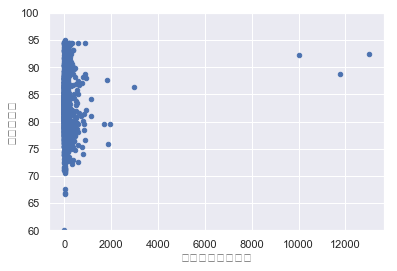

In [52]:
var = '注册资本（万元）'
data = pd.concat([train_num['企业总评分'], train_num[var]], axis=1)
data.plot.scatter(x=var, y='企业总评分',ylim=(60,100));

In [53]:
train_num=train_num[train_num['注册资本（万元）']<4000]

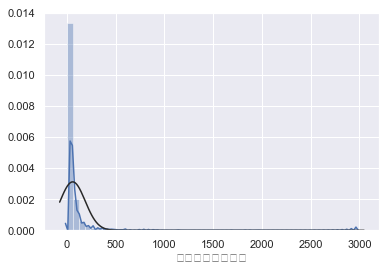

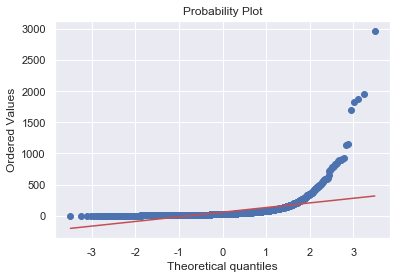

In [54]:
#histogram and normal probability plot
var='注册资本（万元）'
sns.distplot(train_num[var], fit=norm);
fig = plt.figure()
res = stats.probplot(train_num[var], plot=plt)

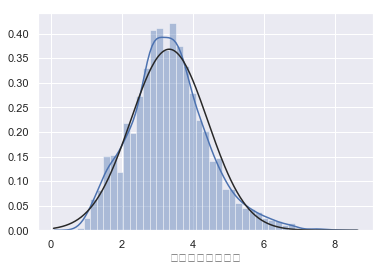

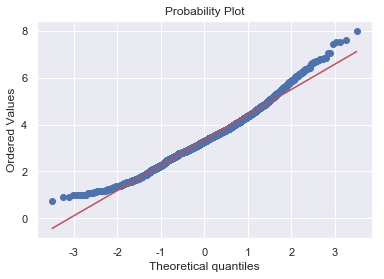

In [55]:
#histogram and normal probability plot
A=np.log(train_num[var])
sns.distplot(A, fit=norm);
fig = plt.figure()
res = stats.probplot(A, plot=plt)

In [56]:
train_num['注册资本（万元）']=np.log(train_num['注册资本（万元）'])

In [197]:
train_num.to_csv("data/train_values0422.csv",index=False,na_rep="NULL",encoding='utf_8_sig')
test_num.to_csv("data/test_values0422.csv",index=False,na_rep="NULL",encoding='utf_8_sig')

In [57]:
train_num.shape

(2913, 50)

In [58]:
test_num.shape

(520, 49)

In [59]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2913 entries, 0 to 2955
Data columns (total 50 columns):
企业编号           2913 non-null int64
营业总收入(元)       2913 non-null float64
存货周转天数(天)      2913 non-null float64
总资产周转率(次)      2913 non-null float64
应收账款周转天数(天)    2913 non-null float64
流动比率           2913 non-null float64
速动比率           2913 non-null float64
资产负债率(%)       2913 non-null float64
基本每股收益(元)      2913 non-null float64
扣非每股收益(元)      2913 non-null float64
稀释每股收益(元)      2913 non-null float64
每股净资产(元)       2913 non-null float64
每股公积金(元)       2913 non-null float64
每股未分配利润(元)     2913 non-null float64
每股经营现金流(元)     2913 non-null float64
毛利率(%)         2913 non-null float64
实际税率(%)        2913 non-null float64
产品类型           2913 non-null float64
纳税A级年份         2913 non-null float64
注册资本（万元）       2913 non-null float64
行业大类（代码）       2913 non-null object
类型             2913 non-null object
经营状态           2913 non-null object
抵押面积(公顷)       2913 non-null float64
土地面积      

In [127]:
train_num.head()

,企业编号,营业总收入(元),存货周转天数(天),总资产周转率(次),应收账款周转天数(天),流动比率,速动比率,资产负债率(%),基本每股收益(元),扣非每股收益(元),...,是否有招投标_No,是否有招投标_Yes,是否认缴_No,是否认缴_Yes,是否有专利_No,是否有专利_Yes,是否有资质_No,是否有资质_Yes,是否有版权_No,是否有版权_Yes
0,1001,9517.0,50207.6489,0.16,-0.983074,7.206956,1.356152,0.407891,12.0170,12.0170,...,0,1,0,1,0,1,0,1,0,1
1,1002,384.1,58.5600,2.03,0.600578,6.570000,1.613759,6.271521,5.4100,5.1200,...,0,1,0,1,0,1,0,1,0,1
2,1003,872.8,494.2700,4.38,0.927193,11.040000,-0.032697,4.168928,0.9009,0.9009,...,0,1,0,1,0,1,0,1,0,1
3,1004,153.5,62.5900,1.36,0.152138,4.040000,-0.632775,2.230774,3.9600,3.9600,...,0,1,0,1,0,1,0,1,1,0
4,1005,485.0,977.2600,1.07,-0.029311,7.960000,0.641031,1.426780,0.6490,0.6490,...,0,1,0,1,0,1,0,1,0,1
